## ¿Como crear una función de perdida en tensorflow?

En este post vamos a ver como crear una función de perdida en tensorflow. Para ello vamos a crear una función de perdida de tipo Huber.

## Funcion de perdida Huber


La funcion de perdida Huber es una funcion de perdida robusta que es menos sensible a los valores atipicos en los datos que la funcion de perdida de error cuadratico medio (MSE) y la funcion de perdida de error absoluto medio (MAE). La funcion de perdida Huber es una combinacion de ambas funciones de perdida. En esta publicacion, aprendera como funciona la funcion de perdida Huber y como implementarla en Python.

## Equacion de la funcion de perdida Huber

La funcion de perdida Huber se define como:

$$l = \begin{cases} \frac{1}{2} (y - \hat{y})^2 & \text{para } |y - \hat{y}| \leq \delta \\ \delta (|y - \hat{y}| - \frac{1}{2} \delta) & \text{en otro caso} \end{cases}$$

Donde $y$ es el valor verdadero, $\hat{y}$ es el valor predicho y $\delta$ es un valor constante que define el umbral entre las dos funciones de perdida. La funcion de perdida Huber es convexa y diferenciable en todas partes, excepto en $y = \hat{y}$

## Importar librerías

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Preparar datos

Para nuestro ejemplo crearemos un conjunto de datos de prueba con una distribución normal con media 0 y desviación estándar 1. Para ello usaremos la función `normal` de la librería `numpy`.

In [2]:
x = np.random.uniform(-1, 1, 100)
y = 2 * x + np.random.normal(0, 0.1, 100)
print(f'x: {x[:5]}')
print(f'y: {y[:5]}')

x: [ 0.09556661  0.4654635   0.83118325 -0.85447542 -0.31583249]
y: [ 0.2331942   0.786064    1.47523312 -1.85194843 -0.68147018]


## Crear la función de pérdida Huber

Ahora vamos a crear la funciones de perdida huber, que resive como parámetros el valor de la predicción y el valor real, y el delta que es el valor que define el punto de inflexión de la función. debemos tener en cuenta que `delta` hiperparámetro que se debe ajustar para cada problema.

In [3]:
def huber_loss(y_true, y_pred, delta = 1.0):
    error = tf.abs(y_true - y_pred)
    return tf.where(error <= delta, 0.5 * error ** 2, delta * (error - 0.5 * delta))

## Crear un modelo en tensorflow

Ahora crearemos un modelo en tf para poder probar nuestra función de perdida.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])
model.compile(optimizer='sgd', loss=lambda y_true, y_pred: tf.keras.losses.Huber()(y_true, y_pred, 2))
history = model.fit(x, y, epochs=100, verbose=0)

model.predict([10])

1/1 [==============================] - 0s 66ms/step


array([[19.569162]], dtype=float32)

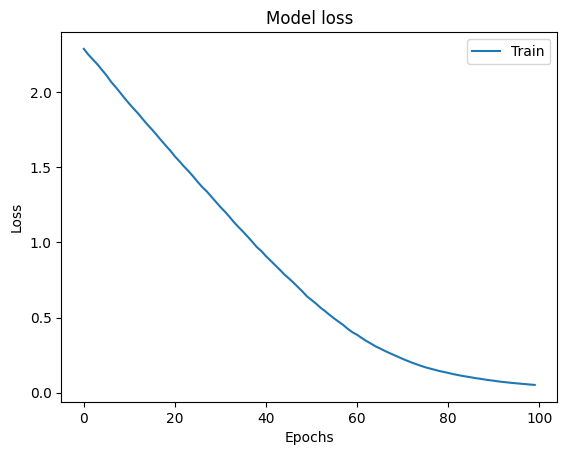

In [5]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Como hemos visto crear una funcion de perdida es muy simple y usarla en tensorflow es aun mas simple. En este caso hemos creado una funcion de perdida que es la funcion de perdida de Huber. En el caso que queramos usar la funcion de perdida Huber recomiendo usar la funcion de perdida de Huber de tensorflow que es mas eficiente que la que hemos creado